In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.applications import vgg16

In [2]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

In [3]:
model = Sequential()



# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(29, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Rishabh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       2

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

Found 69600 images belonging to 29 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
Found 17400 images belonging to 29 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


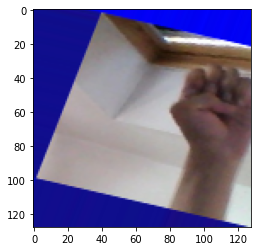

In [6]:
train_datagen=image.ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, 
                                        shear_range=0.2, zoom_range=0.3, horizontal_flip=True, rescale=1/255)
#rescale is very important to normalise the data to a small range

val_datagen=image.ImageDataGenerator(rescale=1/255)
#validation data doesnt need to be augmented

train_generator=train_datagen.flow_from_directory('splitdata\\train',target_size=(128,128),
                                                    batch_size=32)
#size determines the dimensions of the generated pics

print(train_generator.class_indices)

imgs, labels = next(train_generator)

plt.imshow(imgs[1])
labels[1]


val_generator=val_datagen.flow_from_directory('splitdata\\test',target_size=(128,128),
                                                batch_size=32)
print(val_generator.class_indices)

In [7]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model_weights1.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
hist = model.fit(
    train_generator,
    batch_size=32,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks_list
)
print('\nDone.')

model_history=hist.history

model.evaluate(val_generator)

Epoch 1/20
2175/2175 [==============================] - ETA: 0s - loss: 2.8398 - accuracy: 0.1839
Epoch 1: accuracy improved from -inf to 0.18391, saving model to model_weights1.h5
2175/2175 [==============================] - 2215s 1s/step - loss: 2.8398 - accuracy: 0.1839 - val_loss: 2.3472 - val_accuracy: 0.2810
Epoch 2/20
2175/2175 [==============================] - ETA: 0s - loss: 1.7704 - accuracy: 0.4366
Epoch 2: accuracy improved from 0.18391 to 0.43659, saving model to model_weights1.h5
2175/2175 [==============================] - 1045s 480ms/step - loss: 1.7704 - accuracy: 0.4366 - val_loss: 1.4056 - val_accuracy: 0.5267
Epoch 3/20
2175/2175 [==============================] - ETA: 0s - loss: 1.1873 - accuracy: 0.6084
Epoch 3: accuracy improved from 0.43659 to 0.60843, saving model to model_weights1.h5
2175/2175 [==============================] - 1222s 561ms/step - loss: 1.1873 - accuracy: 0.6084 - val_loss: 1.0065 - val_accuracy: 0.6943
Epoch 4/20
2175/2175 [==================

[0.023579731583595276, 0.9924138188362122]

In [8]:
model.save('Model/trainedasl.h5')

In [9]:
import tensorflow as tf; x = [[2.]]; print('tensorflow version', tf.__version__); print('hello, {}'.format(tf.matmul(x, x)))

tensorflow version 2.9.1
hello, [[4.]]


In [10]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [11]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.applications import vgg16